Lets start by importing needed libraries such as numpy and pandas

In [1]:
#Import needed libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os 
from PIL import Image

To start, it's a good idea to take a quick look at the data, or in this case x-rays, to get an idea of what we will be working with. We will set a path to the training images, for both normal and pneumonia cases.  

In [2]:
#set paths to folders with training folder to look at images
train_folder = 'Data/chest_xray/train/'
train_n = 'Data/chest_xray/train/NORMAL/'
train_p = 'Data/chest_xray/train/PNEUMONIA/'

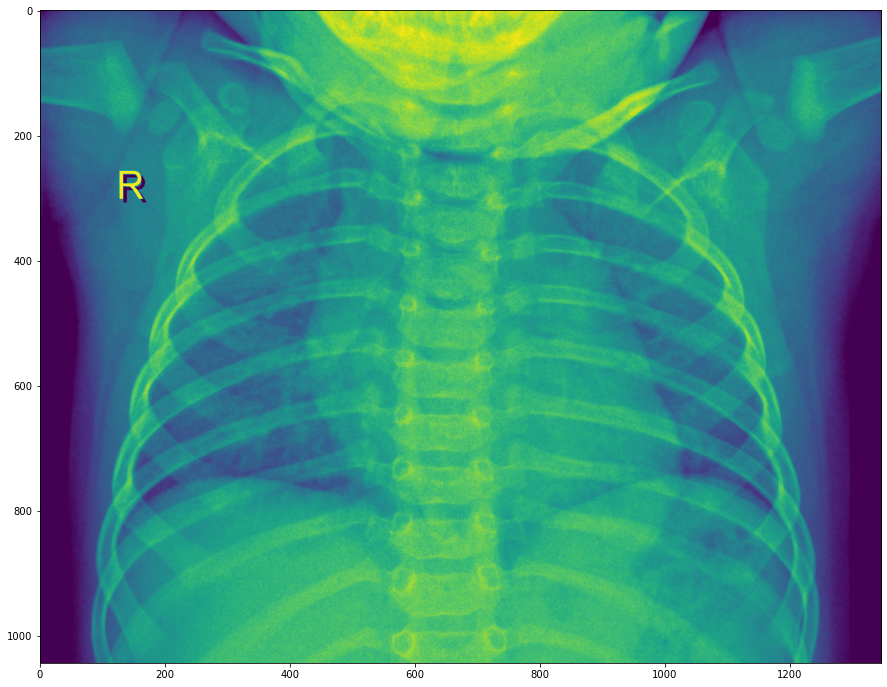

In [3]:
#look at normal xray 
plt.figure(figsize=(20,12))
plt.imshow(Image.open(train_n+os.listdir(train_n)[11]));

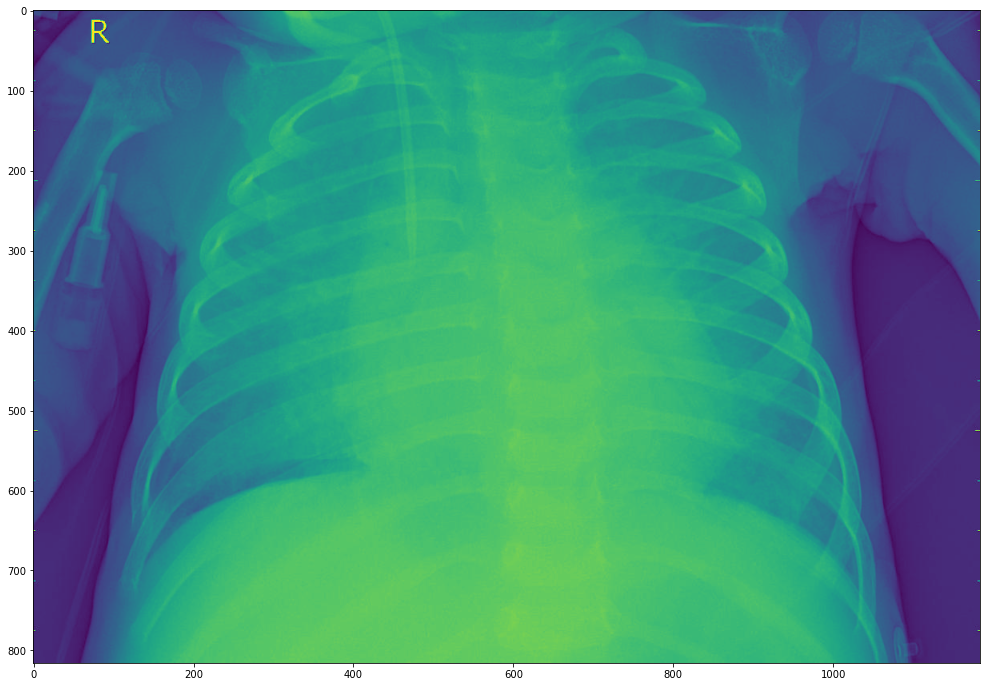

In [5]:
#look at xray with pneumonia 
plt.figure(figsize=(20,12))
plt.imshow(Image.open(train_p+os.listdir(train_p)[6]));

X-rays can be tricky to diagnose when not looking at something obvious like a broken bone, but pneumonia being a viral or bacterial infection causes inflammation in the respiratory organs (lungs). While there is going to be variability in the images as seen above, we can make out some distinctions such as increase distortion in the lungs. 

In [6]:
#import keras image data generator
from keras.preprocessing.image import ImageDataGenerator

#set data generator
datagen = ImageDataGenerator()

Let's also take a quick look at the validation set and load it into a ImageDataGenerator

In [7]:
#set path to validation folder and set validation datagenerator
val_folder = 'Data/chest_xray/val/'
val_gen = datagen.flow_from_directory(val_folder, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 16 images belonging to 2 classes.


There are only 16 images from the dataset in the validation folder which really is not enough to work with. There is over 5200 in the training set, thus it would be best to take some from there to build a better validation set.

In [10]:
#The following lines were ran to split the training data into a validation folder as well so that we have more than 16 images for validation.
#pip install split-folders
#import splitfolders
#splitfolders.ratio(train_folder, output=train_folder, seed=42, ratio=(0.7, 0.3))

Copying files: 5216 files [00:56, 91.74 files/s] 


Now that we have a 70/30 split in our training images to training and validation sets, lets set our paths and setup training, validating and test ImageDataGenerators. 

In [11]:
#Set paths to training, validation and test folder image sets
train_folder = 'Data/chest_xray/train/train/'
val_folder = 'Data/chest_xray/train/val/'
test_folder = 'Data/chest_xray/test/'

In [12]:
#Set the datagenerators for the training, validation and testing image sets. 
train_gen = datagen.flow_from_directory(train_folder, target_size=(150, 150), batch_size=32, class_mode='binary')
val_gen = datagen.flow_from_directory(val_folder, target_size=(150, 150), batch_size=32, class_mode='binary')
test_gen = datagen.flow_from_directory(test_folder, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 3650 images belonging to 2 classes.
Found 1566 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Now we have over 1500 images for our validation and still have over 3600 for our training set. Our test set is smaller at only just over 600 images, but that is plenty for us to test our models. 

We will now build the first image testing model. 

In [13]:
#import keras layers and models
from keras import layers, models

#Setup sequential model
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               42467840  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

Next we will compile our model, and begin training it with the training and validation images. 

In [14]:
#import optimizer form keras
from keras import optimizers

#compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [15]:
#fit and train the first model
history = model.fit(train_gen, steps_per_epoch=60, epochs=20, validation_data=val_gen, validation_steps=20)

Epoch 1/20
60/60 [==============================] - 49s 813ms/step - loss: 44.9584 - acc: 0.6545 - val_loss: 0.8819 - val_acc: 0.8984
Epoch 2/20
60/60 [==============================] - 41s 687ms/step - loss: 2.1997 - acc: 0.8386 - val_loss: 0.5192 - val_acc: 0.9172
Epoch 3/20
60/60 [==============================] - 39s 643ms/step - loss: 0.2822 - acc: 0.9427 - val_loss: 0.4898 - val_acc: 0.8766
Epoch 4/20
60/60 [==============================] - 36s 606ms/step - loss: 0.1710 - acc: 0.9577 - val_loss: 0.1997 - val_acc: 0.9563
Epoch 5/20
60/60 [==============================] - 36s 603ms/step - loss: 0.1068 - acc: 0.9734 - val_loss: 0.2448 - val_acc: 0.9563
Epoch 6/20
60/60 [==============================] - 35s 584ms/step - loss: 0.1361 - acc: 0.9719 - val_loss: 0.1666 - val_acc: 0.9516
Epoch 7/20
60/60 [==============================] - 35s 587ms/step - loss: 0.0866 - acc: 0.9781 - val_loss: 0.4219 - val_acc: 0.9391
Epoch 8/20
60/60 [==============================] - 35s 580ms/step -

Now that we have built the first model, let's visualize how it performed through the epochs. We will build graphs for both the accuracy and the loss, for both the training and validation image sets. 

Accuracy is the frequency of how often the model correctly predicts a case of pneumonia. The closer to 1.0, the more accurate the model.

Loss is used to measure inconsistencies between the predicted and actual values. The closer the loss is to 0.0, the better.


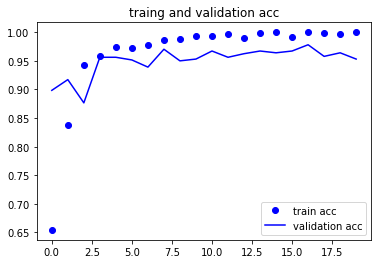

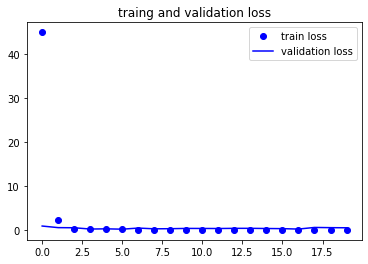

In [16]:
#visualize how the model performed through the epochs
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='train acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('traing and validation acc')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='train loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('traing and validation loss')
plt.legend();

In [17]:
#save the first model
#model.save('pneumonia_detection1.h5')

Now we will test the model against the test images. These x-rays are new to the model and it has not seen them before thus giving us a good idea on how the model performs in real world conditions. 

In [18]:
#test the first model to see how it performs on new images
test_loss, test_acc = model.evaluate(test_gen, steps=31)

31/31 [==============================] - 9s 294ms/step - loss: 6.4188 - acc: 0.7387


So our first model did well on the training (with accuracy apporaching 100%) and validation data(accuracy of 97.3%), but failed to replicate the results on our testing data with an accuracy of 73.9%. Overall it still performed fairly well for a first attempt and is a good place to build from. 

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

In [20]:
#Add a confusion matrix

#def print_metrics(y_test, y_pred, model):
    
    #return scores for the model
#    print("Precision Score: {:.4}".format(precision_score(y_test, y_pred)))
#    print("Recall Score:    {:.4}".format(recall_score(y_test, y_pred)))
#    print("Accuracy Score:  {:.4}".format(accuracy_score(y_test, y_pred)))
#    print("F1 Score:        {:.4}".format(f1_score(y_test, y_pred)))
#    
#    # cross validation score
#    #cv_score = cross_val_score(model, X_test_scaled, y_test, cv=5)
#   #mean_dt_cv_score = np.mean(cv_score)

    #print("Mean Cross Validation Score: {:.4}".format(mean_dt_cv_score))
    
#    cnf_matrix = confusion_matrix(y_test, y_pred)
#    matrix = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
#    matrix.plot();

In [21]:
#Y_pred = model.predict(test_gen)
#y_pred = np.argmin(Y_pred, axis=1)
#y_pred

In [22]:
#y_test = test_gen.classes

In [23]:
#target_names = []
#for key in test_gen.class_indices:
#    target_names.append(key)
    
#target_names

In [24]:
#print_metrics(y_test, y_pred, model)

Next lets try another model with a few more layers.

In [25]:
#build the second model
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(256, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Flatten())

model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 256)      

In [26]:
#compile the second model
model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [27]:
#train the model
result2 = model2.fit(train_gen, steps_per_epoch=100, epochs=30, validation_data=val_gen, validation_steps=30, batch_size=64)

Epoch 1/30
100/100 [==============================] - 45s 454ms/step - loss: 3.8724 - acc: 0.7461 - val_loss: 4.0029 - val_acc: 0.7375
Epoch 2/30
100/100 [==============================] - 45s 446ms/step - loss: 3.8821 - acc: 0.7454 - val_loss: 4.0823 - val_acc: 0.7323
Epoch 3/30
100/100 [==============================] - 44s 443ms/step - loss: 3.9061 - acc: 0.7438 - val_loss: 3.8600 - val_acc: 0.7469
Epoch 4/30
100/100 [==============================] - 45s 449ms/step - loss: 3.9205 - acc: 0.7429 - val_loss: 4.0188 - val_acc: 0.7365
Epoch 5/30
100/100 [==============================] - 45s 447ms/step - loss: 3.8933 - acc: 0.7447 - val_loss: 3.7488 - val_acc: 0.7542
Epoch 6/30
100/100 [==============================] - 45s 446ms/step - loss: 3.9061 - acc: 0.7438 - val_loss: 4.1618 - val_acc: 0.7271
Epoch 7/30
100/100 [==============================] - 46s 461ms/step - loss: 3.9254 - acc: 0.7426 - val_loss: 4.0029 - val_acc: 0.7375
Epoch 8/30
100/100 [==============================] - 4

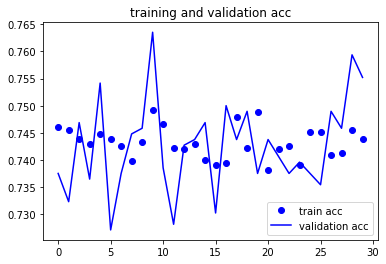

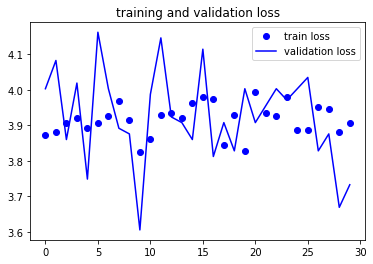

In [28]:
acc = result2.history['acc']
val_acc = result2.history['val_acc']
loss = result2.history['loss']
val_loss = result2.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='train acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation acc')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='train loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend();

In [29]:
#model2.save('pneumonia_detection2.h5')

In [30]:
#test and evaluate the second model
test_loss, test_acc = model2.evaluate(test_gen, steps=30)

30/30 [==============================] - 9s 299ms/step - loss: 5.6676 - acc: 0.6283


Ok so this model was al over the place and did not perform nearly as well as our first model. While we did see a slight decrease in the loss, we saw a reduction in accuracy to only about 63%. 

In [31]:
'''
model4.add(layers.Dense(20, activation='relu', input_shape=(67500,)))
model4.add(layers.Dense(7, activation='relu'))
model4.add(layers.Dense(5, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))
'''

"\nmodel4.add(layers.Dense(20, activation='relu', input_shape=(67500,)))\nmodel4.add(layers.Dense(7, activation='relu'))\nmodel4.add(layers.Dense(5, activation='relu'))\nmodel4.add(layers.Dense(1, activation='sigmoid'))\n"

In [32]:
'''
model3 = models.Sequential()

model3.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,3)))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model3.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.1))
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model3.add(Conv2D(64 , (,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2), padding = 'same'))

model3.add(Conv2D(128 , (4,4) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2), padding = 'same'))

model3.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model3.add(Flatten())
model3.add(Dense(units = 128 , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units = 1 , activation = 'sigmoid'))
model3.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model3.summary()
'''

'\nmodel3 = models.Sequential()\n\nmodel3.add(Conv2D(32 , (3,3) , strides = 1 , padding = \'same\' , activation = \'relu\' , input_shape = (150,150,3)))\nmodel3.add(BatchNormalization())\nmodel3.add(MaxPool2D((2,2) , strides = 2 , padding = \'same\'))\n\nmodel3.add(Conv2D(64 , (3,3) , strides = 1 , padding = \'same\' , activation = \'relu\'))\nmodel3.add(Dropout(0.1))\nmodel3.add(MaxPool2D((2,2) , strides = 2 , padding = \'same\'))\n\nmodel3.add(Conv2D(64 , (,3) , strides = 1 , padding = \'same\' , activation = \'relu\'))\nmodel3.add(BatchNormalization())\nmodel3.add(MaxPool2D((2,2), padding = \'same\'))\n\nmodel3.add(Conv2D(128 , (4,4) , strides = 1 , padding = \'same\' , activation = \'relu\'))\nmodel3.add(Dropout(0.2))\nmodel3.add(BatchNormalization())\nmodel3.add(MaxPool2D((2,2), padding = \'same\'))\n\nmodel3.add(Conv2D(256 , (3,3) , strides = 1 , padding = \'same\' , activation = \'relu\'))\nmodel3.add(MaxPool2D((2,2) , strides = 2 , padding = \'same\'))\n\nmodel3.add(Flatten())\

In [33]:
#import even more things for our third model
import cv2
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

#build the third model
model3 = models.Sequential()

model3.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (150,150,3)))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2), padding = 'same'))
model3.add(layers.Dense(20, activation='relu', input_shape=(67500,)))

model3.add(Conv2D(64 , (3,3), padding = 'same', activation = 'relu'))
model3.add(Dropout(0.3))
#model3.add(MaxPool2D((2,2), padding = 'same'))
model3.add(layers.Dense(7, activation='relu'))

model3.add(Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu'))
#model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(MaxPool2D((2,2), padding = 'same'))
model3.add(layers.Dense(5, activation='relu'))

model3.add(Conv2D(128, (4,4), strides = 1, padding = 'same', activation = 'relu'))
model3.add(Dropout(0.2))
#model3.add(BatchNormalization())
#model3.add(MaxPool2D((2,2), padding = 'same'))

model3.add(Conv2D(256 , (3,3) , strides = 1, padding = 'same', activation = 'relu'))
model3.add(MaxPool2D((2,2) , strides = 2, padding = 'same'))

model3.add(Flatten())
#model3.add(Dropout(0.2))
model3.add(Dense(units = 1, activation = 'sigmoid'))
model3.compile(optimizer = "rmsprop", loss = 'binary_crossentropy', metrics = ['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 75, 75, 20)        660       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        11584     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
dense_5 (Dense)              (None, 75, 75, 7)        

In [34]:
result3 = model3.fit(train_gen, steps_per_epoch=100, epochs=50, validation_data=val_gen, validation_steps=30, batch_size=64)

Epoch 1/50
100/100 [==============================] - 74s 738ms/step - loss: 0.3558 - accuracy: 0.8744 - val_loss: 0.3427 - val_accuracy: 0.8885
Epoch 2/50
100/100 [==============================] - 73s 734ms/step - loss: 0.1300 - accuracy: 0.9549 - val_loss: 0.1348 - val_accuracy: 0.9594
Epoch 3/50
100/100 [==============================] - 74s 738ms/step - loss: 0.0970 - accuracy: 0.9691 - val_loss: 0.1257 - val_accuracy: 0.9604
Epoch 4/50
100/100 [==============================] - 73s 735ms/step - loss: 0.0780 - accuracy: 0.9707 - val_loss: 0.1237 - val_accuracy: 0.9542
Epoch 5/50
100/100 [==============================] - 74s 736ms/step - loss: 0.0650 - accuracy: 0.9773 - val_loss: 0.1064 - val_accuracy: 0.9656
Epoch 6/50
100/100 [==============================] - 74s 736ms/step - loss: 0.0502 - accuracy: 0.9833 - val_loss: 0.0965 - val_accuracy: 0.9635
Epoch 7/50
100/100 [==============================] - 74s 742ms/step - loss: 0.0467 - accuracy: 0.9836 - val_loss: 0.1737 - val_ac

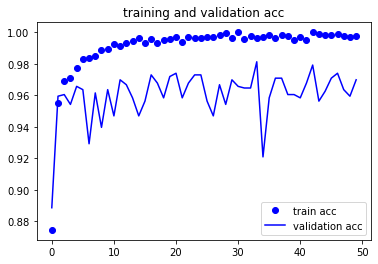

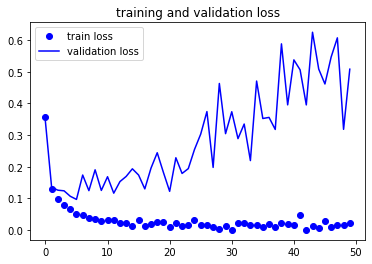

In [35]:
acc3 = result3.history['accuracy']
val_acc3 = result3.history['val_accuracy']
loss3 = result3.history['loss']
val_loss3 = result3.history['val_loss']
epochs3 = range(len(acc3))

plt.plot(epochs3, acc3, 'bo', label='train acc')
plt.plot(epochs3, val_acc3, 'b', label='validation acc')
plt.title('training and validation acc')
plt.legend()
plt.figure()

plt.plot(epochs3, loss3, 'bo', label='train loss')
plt.plot(epochs3, val_loss3, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend();

In [36]:
#model3.save('pneumonia_detection3.h5')

In [37]:
test_loss, test_acc = model3.evaluate(test_gen)

32/32 [==============================] - 5s 146ms/step - loss: 5.5008 - accuracy: 0.7981


Overall this model performed the best with the highest accuracy, and lower loss than our first model. 

# Something Different

Let's take a diffrent apporach to preparing our train, validation and testing images.

In [38]:
train = [file for file in os.listdir(train_folder) if file.endswith('.jpg')]
val = [file for file in os.listdir(val_folder) if file.endswith('.jpg')]
test = [file for file in os.listdir(test_folder) if file.endswith('.jpg')]

In [39]:
train_gen = ImageDataGenerator(rescale=1./255, shear_range=0.3, zoom_range=0.3, horizontal_flip=True).flow_from_directory(train_folder, target_size=(150, 150), batch_size=3650)
val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(150, 150), batch_size=1566)
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(150, 150), batch_size=624)

Found 3650 images belonging to 2 classes.
Found 1566 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [40]:
train_img, train_labels = next(train_gen)
val_img, val_labels = next(val_gen)
test_img, test_labels = next(test_gen)

In [41]:
m_train = train_img.shape[0]
num_px = train_img.shape[1]
m_test = test_img.shape[0]
m_val = val_img.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_img.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_img.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_img.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 3650
Number of testing samples: 624
Number of validation samples: 1566
train_images shape: (3650, 150, 150, 3)
train_labels shape: (3650, 2)
test_images shape: (624, 150, 150, 3)
test_labels shape: (624, 2)
val_images shape: (1566, 150, 150, 3)
val_labels shape: (1566, 2)


In [42]:
train_imgs = train_img.reshape(train_img.shape[0], -1)
test_imgs = test_img.reshape(test_img.shape[0], -1)
val_imgs = val_img.reshape(val_img.shape[0], -1)

print(train_imgs.shape)
print(test_imgs.shape)
print(val_imgs.shape)

(3650, 67500)
(624, 67500)
(1566, 67500)


In [43]:
y_train = np.reshape(train_labels[:,0], (3650,1))
y_val = np.reshape(val_labels[:,0], (1566,1))
y_test = np.reshape(test_labels[:,0], (624,1))

In [44]:
model4 = models.Sequential()
model4.add(layers.Dense(20, activation='relu', input_shape=(67500,)))
model4.add(layers.Dense(7, activation='relu'))
model4.add(layers.Dense(5, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
result4 = model4.fit(train_imgs, y_train, epochs=30, validation_data=(val_imgs, y_val))

Epoch 1/30
115/115 [==============================] - 1s 6ms/step - loss: 0.5512 - accuracy: 0.7373 - val_loss: 0.5732 - val_accuracy: 0.7427
Epoch 2/30
115/115 [==============================] - 1s 6ms/step - loss: 0.5172 - accuracy: 0.7430 - val_loss: 0.4627 - val_accuracy: 0.7427
Epoch 3/30
115/115 [==============================] - 1s 6ms/step - loss: 0.4600 - accuracy: 0.7838 - val_loss: 0.4240 - val_accuracy: 0.7427
Epoch 4/30
115/115 [==============================] - 1s 5ms/step - loss: 0.4411 - accuracy: 0.7901 - val_loss: 0.8642 - val_accuracy: 0.7433
Epoch 5/30
115/115 [==============================] - 1s 6ms/step - loss: 0.3994 - accuracy: 0.8268 - val_loss: 0.6115 - val_accuracy: 0.7650
Epoch 6/30
115/115 [==============================] - 1s 5ms/step - loss: 0.3927 - accuracy: 0.8244 - val_loss: 0.3159 - val_accuracy: 0.8857
Epoch 7/30
115/115 [==============================] - 1s 5ms/step - loss: 0.3824 - accuracy: 0.8419 - val_loss: 0.3351 - val_accuracy: 0.8582
Epoch 

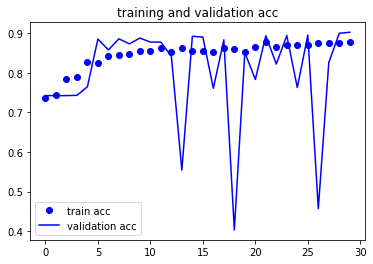

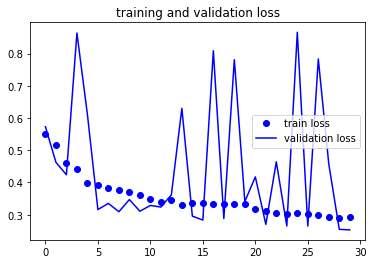

In [46]:
acc4 = result4.history['accuracy']
val_acc4 = result4.history['val_accuracy']
loss4 = result4.history['loss']
val_loss4 = result4.history['val_loss']
epochs4 = range(len(acc4))

plt.plot(epochs4, acc4, 'bo', label='train acc')
plt.plot(epochs4, val_acc4, 'b', label='validation acc')
plt.title('training and validation acc')
plt.legend()
plt.figure()

plt.plot(epochs4, loss4, 'bo', label='train loss')
plt.plot(epochs4, val_loss4, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend();

In [47]:
test_loss, test_acc = model4.evaluate(test_imgs, y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8333
